In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-73gi3efx
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-73gi3efx
  Stored in directory: /tmp/pip-ephem-wheel-cache-s0h93vhp/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
import statsmodels.api as sm

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [0]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#superbowl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [0]:
print(len(status_count))
print(len(retweet_count))
print(len(friends_count))
# print(len(mentions_count))


print((status_count[0:100]))
print(hashtag_count[0:100])
print(friends_count[0:100])
print(mentions_TF[0:100])
print(favourites_count[0:100])

print(url_ratio_count[0:100])
print(len(url_ratio_count))


1213813
1213813
1213813
[82505, 427, 5463, 60, 4598, 14011, 93597, 6141, 4920, 1221, 2719, 8980, 8, 11929, 17633, 43194, 268, 220, 48479, 19203, 710, 15835, 56, 2203, 2209, 2, 144179, 7959, 2215, 10092, 9020, 10093, 4327, 7481, 274788, 9675, 4323, 4654, 4661, 85766, 24584, 2417, 25163, 13212, 8675, 4461, 8234, 7762, 14478, 12076, 3502, 283, 2339, 1581, 12078, 5257, 9051, 9110, 2205, 143371, 6069, 13218, 2159, 85801, 453, 2748, 19266, 306903, 4181, 1944, 3614, 151900, 1532, 8515, 800, 1628, 14599, 85808, 4612, 40753, 440, 5327, 90819, 959, 1582, 1028, 8, 144312, 757, 10210, 3159, 187, 2347, 39687, 134820, 2130, 45601, 2268, 450, 37653]
[7, 6, 5, 4, 2, 2, 3, 1, 5, 5, 6, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 3, 5, 2, 1, 1, 4, 2, 2, 4, 2, 4, 1, 1, 9, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3, 3, 9, 1, 3, 3, 1, 1, 3, 5, 6, 2, 3, 1, 4, 3, 7, 1, 2, 1, 2, 5, 3, 3, 1, 4, 1, 5, 4, 1, 0, 4, 4, 1, 2, 2, 6, 3, 1, 3, 2, 1, 3, 7, 1]
[17, 316, 1987, 380, 142440, 19911, 4595, 761, 451, 139,

In [0]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(tweet_time, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  585.7836111111111
Average number of tweets per hour 2072.11840170408


In [19]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]

for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    for indexlayer in innerelement:
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)

n_tweet= np.histogram(tweet_window,bins=int(np.ceil(timerange.total_seconds()/(60*60)))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

587
587
587
587
587


In [20]:
df.head()

,# of Tweets,# of retweets,Sum n followers,Max followers,Mentions,Status,Hashtags,Friends,Favourites,Time of day
0,8,9,3181.0,1495.0,4,187887,20,3554,25125,0
1,6,8,12618.0,7605.0,2,305582,17,13449,11304,1
2,12,75,1406539.0,1362401.0,3,220096,22,6925,20855,2
3,10,10,3210.0,1557.0,5,57482,26,5209,991,3
4,11,16,27896.0,9902.0,6,586372,30,15695,14040,4


In [21]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


# fig = plt.figure(figsize=(16,11))
# fig = sm.graphics.plot_partregress_grid(results, fig=fig)
# fig.show()
# # plot fitted values vs true values
# plt.figure(figsize=(16,11))
# plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
# plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
# plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
# plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
# plt.title('Fitted Values vs True Values', fontsize = 16)
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     464.1
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          8.89e-268
Time:                        20:32:16   Log-Likelihood:                -5865.1
No. Observations:                 586   AIC:                         1.175e+04
Df Residuals:                     575   BIC:                         1.180e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -560.5199    455.609     -1.230      0.2

In [0]:

df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
#                   'Sum n followers', 
#                   'Max followers', 
                  'Mentions',
#                   'Status', 
#                   'Hashtags', 
#                   'Friends', 
#                   'Favourites',
#                   'Time of day'
                 ])

In [18]:
df.head()

,# of Tweets,# of retweets,Mentions
0,8,9,4
1,6,8,2
2,12,75,3
3,10,10,5
4,11,16,6


PREDICTION [-8.69926725e+02 -9.04197873e+02 -9.53275946e+02 -8.54093381e+02
 -8.42088490e+02 -8.62489045e+02 -8.37799930e+02 -6.93302789e+02
 -7.01892693e+02 -7.48046553e+02 -6.36474386e+02 -6.17310319e+02
 -6.33046615e+02 -4.31151133e+02 -6.22484946e+02 -6.92441853e+02
 -7.82414603e+02 -7.68615925e+02 -9.26767912e+02 -7.34623427e+02
 -7.17409617e+02 -7.95618356e+02 -7.94782552e+02 -8.44595902e+02
 -8.69926725e+02 -8.51028815e+02 -8.91260131e+02 -7.81203101e+02
 -8.35765263e+02 -7.79046255e+02 -7.26810049e+02 -6.88820133e+02
 -5.55297983e+02 -3.93392937e+02 -6.96620873e+02 -6.70820783e+02
 -5.98315361e+02 -7.30469685e+02 -7.92507152e+02 -6.52514318e+02
 -8.14068799e+02 -7.47586301e+02 -7.54357141e+02 -1.19526019e+03
 -7.61444256e+02 -7.02775136e+02 -5.63921888e+02 -8.36685476e+02
 -8.58563543e+02 -9.13695352e+02 -9.30364500e+02 -8.66486462e+02
 -8.63130753e+02 -6.85561326e+02 -7.11292979e+02 -5.34002348e+02
 -1.06329918e+03 -4.52816931e+02 -4.12303486e+02 -5.00132029e+02
 -5.23647558e+

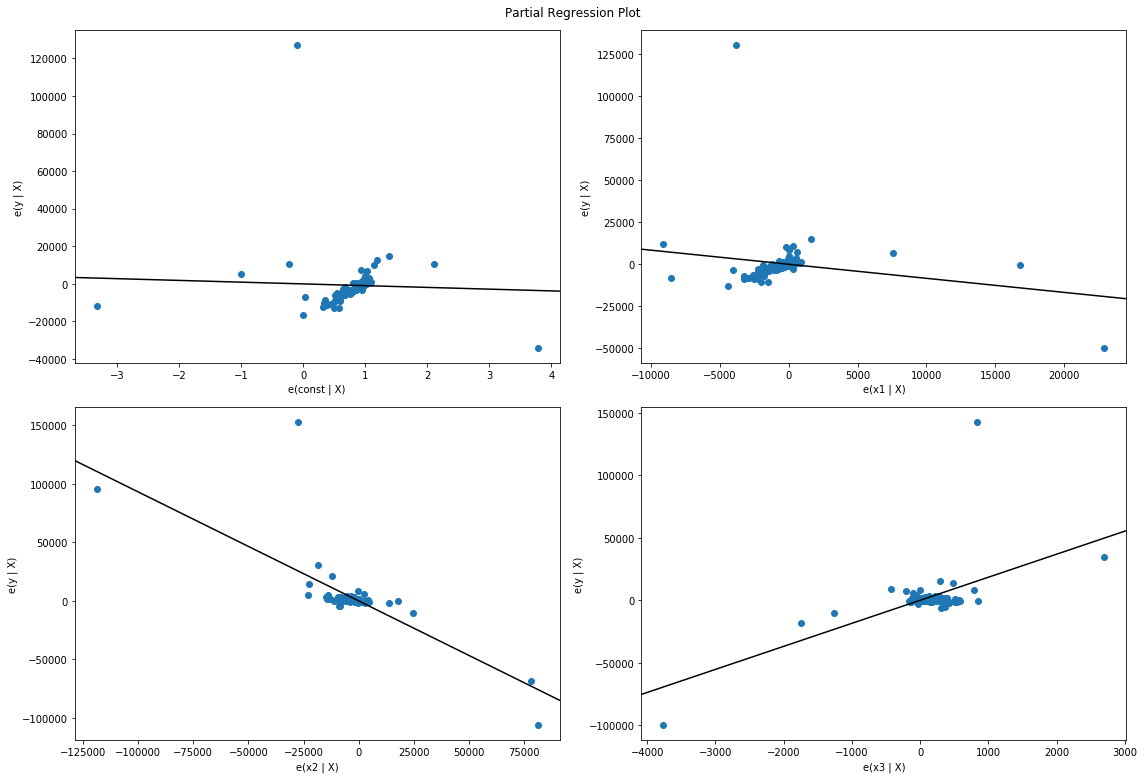

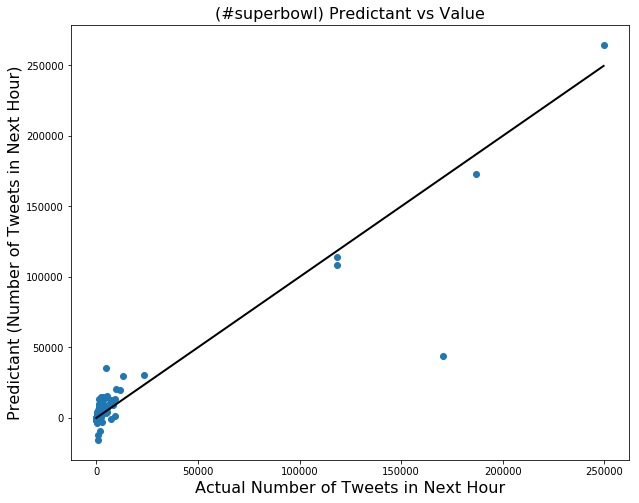

4

In [23]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Mentions'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(10,8))
plt.scatter(output_arr, output_predicted)
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=2, color='black')
# plt.plot(input_arr,output_predicted, lw=4)
plt.ylabel('Predictant (Number of Tweets in Next Hour)', fontsize = 16)
plt.xlabel('Actual Number of Tweets in Next Hour', fontsize = 16)
plt.title('(#superbowl) Predictant vs Value', fontsize = 16)
plt.show()
len(res.pvalues)

In [0]:
res.pvalues

array([0.05051293, 0.0690082 , 0.47759074, 0.01756607])

In [0]:
# x1            -5.9692      0.679     -8.788      0.000      -7.303      -4.635
# x2            -0.6214      0.069     -8.998      0.000      -0.757      -0.486
# x3           5.25e-06   2.51e-05      0.209      0.835   -4.41e-05    5.46e-05
# x4         -3.624e-05      0.000     -0.309      0.758      -0.000       0.000
# x5          8.659e-05   4.64e-05      1.865      0.063   -4.58e-06       0.000
# x6             1.8496      0.253      7.313      0.000       1.353       2.346
# x7            -0.0038      0.001     -6.034      0.000      -0.005      -0.003
# x8            19.3173      2.130      9.069      0.000      15.134      23.501
# x9             0.0019      0.000      6.082      0.000       0.001       0.003
# x10          -22.1796     32.664     -0.679      0.497     -86.335      41.975